# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


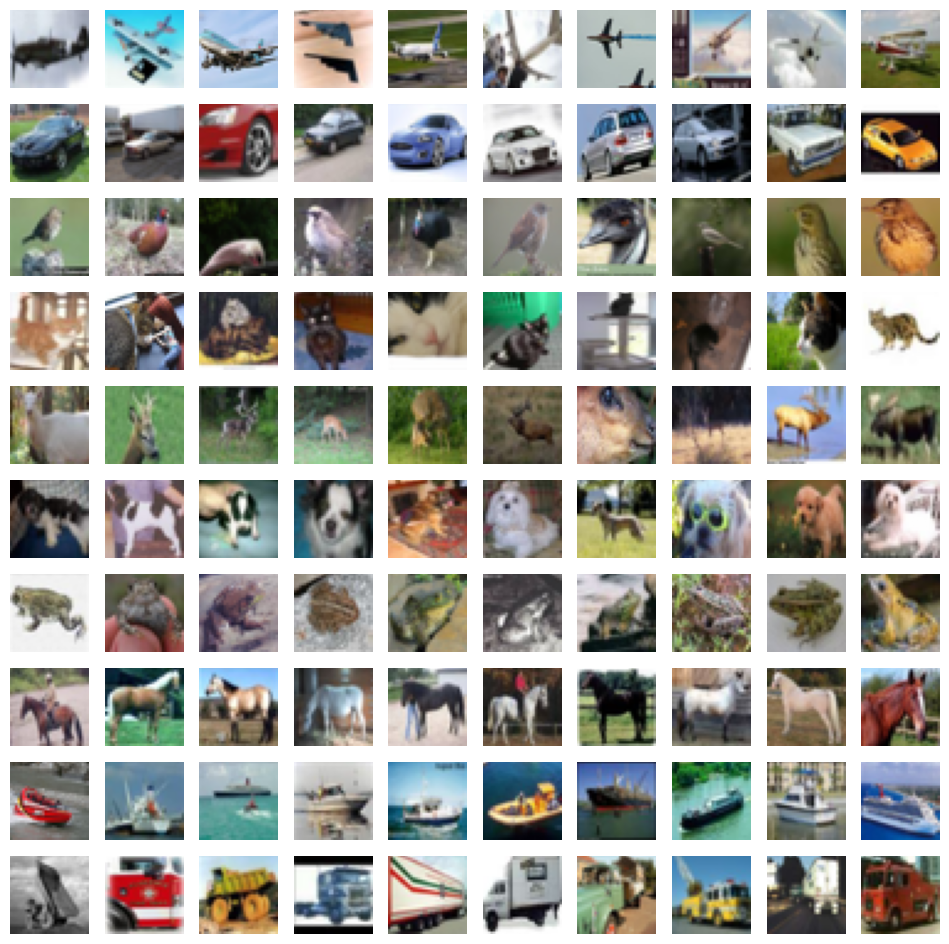

In [4]:
# 1️⃣ تطبيع الصور (Normalization)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2️⃣ تحويل التصنيفات إلى One-Hot Encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3️⃣ عرض 10 صور عشوائية لكل فئة من فئات CIFAR-10
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
class_indices = {i: np.where(y_train.argmax(axis=1) == i)[0] for i in range(10)}

for i in range(10):  # لكل فئة من 0 إلى 9
    samples = np.random.choice(class_indices[i], 10, replace=False)  # اختر 10 صور عشوائية
    for j, img_idx in enumerate(samples):
        axes[i, j].imshow(x_train[img_idx])  # عرض الصورة
        axes[i, j].axis('off')  # إخفاء المحاور



## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [5]:
from keras.backend import clear_session
clear_session()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# إنشاء نموذج تسلسلي
model = Sequential([
    # 1️⃣ طبقة Convolutional (مرشح 3x3، عدد الفلاتر 32)
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),

    # 2️⃣ طبقة Max Pooling (تصغير الحجم)
    MaxPooling2D(pool_size=(2,2)),

    # 3️⃣ Flatten لتحويل المخرجات إلى متجه يمكن إدخاله في Dense
    Flatten(),

    # 4️⃣ طبقة Fully Connected بـ 100 نيوترون
    Dense(100, activation='relu'),

    # 5️⃣ طبقة التصنيف النهائية (10 فئات، softmax)
    Dense(10, activation='softmax')
])

# طباعة ملخص النموذج
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [7]:
from tensorflow.keras.optimizers import SGD

# تجميع النموذج
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

# تدريب النموذج
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.1543 - loss: 2.2782 - val_accuracy: 0.2172 - val_loss: 2.1769
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2330 - loss: 2.1434 - val_accuracy: 0.2730 - val_loss: 2.0517
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2796 - loss: 2.0311 - val_accuracy: 0.2936 - val_loss: 1.9901
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3091 - loss: 1.9601 - val_accuracy: 0.3323 - val_loss: 1.9246
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3329 - loss: 1.9159 - val_accuracy: 0.3417 - val_loss: 1.8906
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3432 - loss: 1.8795 - val_accuracy: 0.3544 - val_loss: 1.8495
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3644 - loss: 1.8386 - val_accuracy: 0.3340 - val_loss: 1.8626
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3720 - loss: 1.8133 - val_accuracy: 0.3684 - v

*   Plot the cross entropy loss curve and the accuracy curve

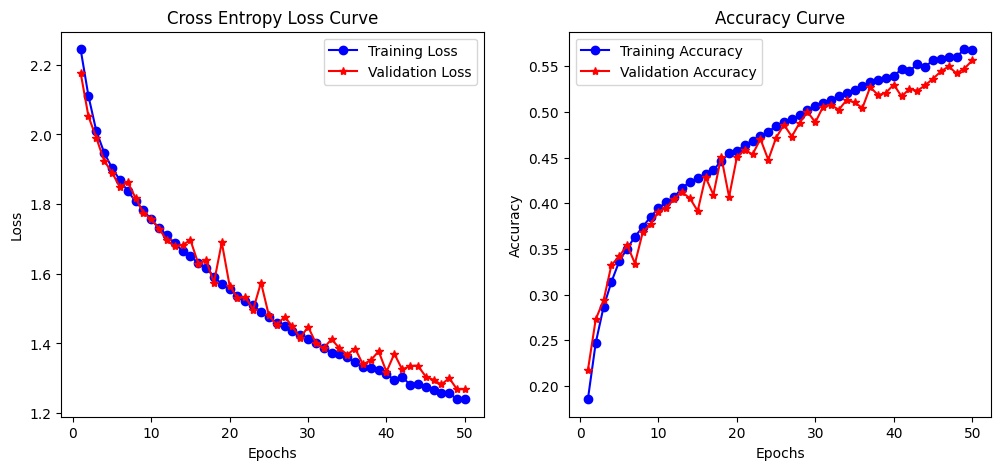

In [8]:
import matplotlib.pyplot as plt

# استخراج بيانات التدريب من history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

# رسم منحنى الخسارة
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss Curve')
plt.legend()

# رسم منحنى الدقة
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [9]:
from keras.backend import clear_session
clear_session()

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# تنظيف الجلسة
from keras.backend import clear_session
clear_session()

# بناء النموذج
model_vgg = Sequential()

# إضافة الطبقات التلافيفية
model_vgg.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_vgg.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# إضافة طبقة Max Pooling
model_vgg.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten لتحويل المصفوفة إلى متجه
model_vgg.add(Flatten())

# إضافة الطبقة Dense بـ 128 وحدة
model_vgg.add(Dense(128, activation='relu'))

# إضافة طبقة التصنيف النهائية (Softmax مع 10 وحدات)
model_vgg.add(Dense(10, activation='softmax'))

# طباعة ملخص النموذج
model_vgg.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [11]:
from tensorflow.keras.optimizers import SGD

# تجميع النموذج
model_vgg.compile(
    loss='categorical_crossentropy',  # دالة فقدان التصنيف المتعدد
    optimizer=SGD(learning_rate=0.01, momentum=0.9),  # استخدام learning_rate بدلاً من lr
    metrics=['accuracy']  # قياس الدقة أثناء التدريب
)

# تدريب النموذج لمدة 50 حقبة باستخدام بيانات CIFAR-10
history = model_vgg.fit(
    x_train, y_train,  # بيانات التدريب
    validation_data=(x_test, y_test),  # بيانات الاختبار للتحقق من الأداء
    epochs=50,  # عدد الحقبات
    batch_size=512,  # حجم الدفعة
    verbose=1  # إظهار تقدم التدريب
)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.2043 - loss: 2.1601 - val_accuracy: 0.3669 - val_loss: 1.8096
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3797 - loss: 1.7752 - val_accuracy: 0.4321 - val_loss: 1.6040
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.4460 - loss: 1.5717 - val_accuracy: 0.4903 - val_loss: 1.4486
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4947 - loss: 1.4166 - val_accuracy: 0.5279 - val_loss: 1.3301
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5381 - loss: 1.2968 - val_accuracy: 0.5502 - val_loss: 1.2776
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5654 - loss: 1.2243 - val_accuracy: 0.5663 - val_loss: 1.2201
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5955 - loss: 1.1484 - val_accuracy: 0.5683 - val_loss: 1.2349
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6158 - loss: 1.0954 - val_accuracy: 0.6083 - 

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.2013 - loss: 2.1646 - val_accuracy: 0.3521 - val_loss: 1.8289
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3736 - loss: 1.7847 - val_accuracy: 0.4052 - val_loss: 1.6577
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4310 - loss: 1.6150 - val_accuracy: 0.4663 - val_loss: 1.4950
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4807 - loss: 1.4661 - val_accuracy: 0.5011 - val_loss: 1.4143
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5078 - loss: 1.3874 - val_accuracy: 0.5270 - val_loss: 1.3197
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5474 - loss: 1.2870 - val_accuracy: 0.5548 - val_loss: 1.2598
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5682 - loss: 1.2264 - val_accuracy: 0.5724 - val_loss: 1.2242
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5826 - loss: 1.1928 - val_accuracy: 0.5807 - v

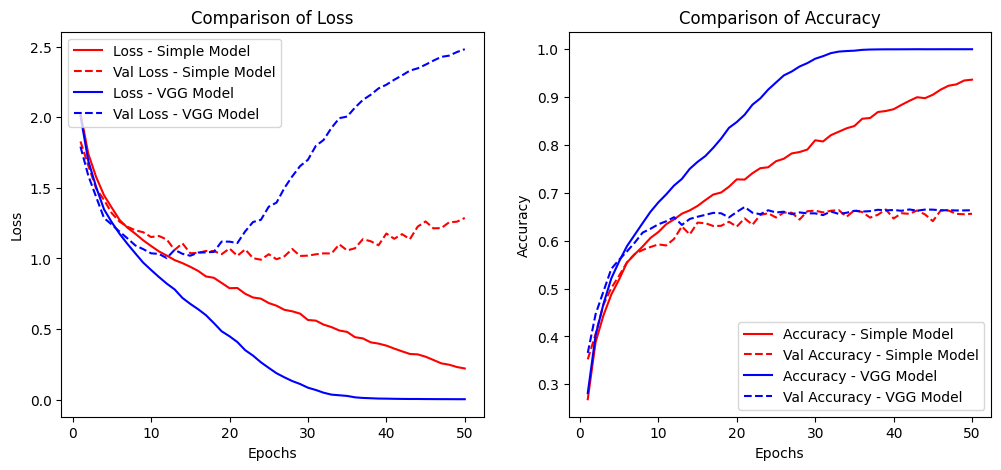

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# تنظيف الجلسة لضمان عدم وجود أي نماذج قديمة في الذاكرة
from tensorflow.keras.backend import clear_session
clear_session()

# ✅ **1️⃣ بناء النموذج البسيط**
model_simple = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# تجميع النموذج
model_simple.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'])

# ✅ **2️⃣ بناء نموذج VGG الأعمق**
model_vgg = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# تجميع نموذج VGG
model_vgg.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'])

# ✅ **3️⃣ تدريب النموذج البسيط**
history_simple = model_simple.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test)
)

# ✅ **4️⃣ تدريب نموذج VGG**
history_vgg = model_vgg.fit(
    x_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(x_test, y_test)
)

# ✅ **5️⃣ استخراج بيانات التدريب للمقارنة**
loss_simple = history_simple.history['loss']
val_loss_simple = history_simple.history['val_loss']
acc_simple = history_simple.history['accuracy']
val_acc_simple = history_simple.history['val_accuracy']

loss_vgg = history_vgg.history['loss']
val_loss_vgg = history_vgg.history['val_loss']
acc_vgg = history_vgg.history['accuracy']
val_acc_vgg = history_vgg.history['val_accuracy']

epochs = range(1, 51)  # عدد الحقبات 50

# ✅ **6️⃣ رسم منحنى الخسارة (Loss)**
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_simple, 'r', label='Loss - Simple Model')
plt.plot(epochs, val_loss_simple, 'r--', label='Val Loss - Simple Model')
plt.plot(epochs, loss_vgg, 'b', label='Loss - VGG Model')
plt.plot(epochs, val_loss_vgg, 'b--', label='Val Loss - VGG Model')
plt.title('Comparison of Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# ✅ **7️⃣ رسم منحنى الدقة (Accuracy)**
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_simple, 'r', label='Accuracy - Simple Model')
plt.plot(epochs, val_acc_simple, 'r--', label='Val Accuracy - Simple Model')
plt.plot(epochs, acc_vgg, 'b', label='Accuracy - VGG Model')
plt.plot(epochs, val_acc_vgg, 'b--', label='Val Accuracy - VGG Model')
plt.title('Comparison of Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


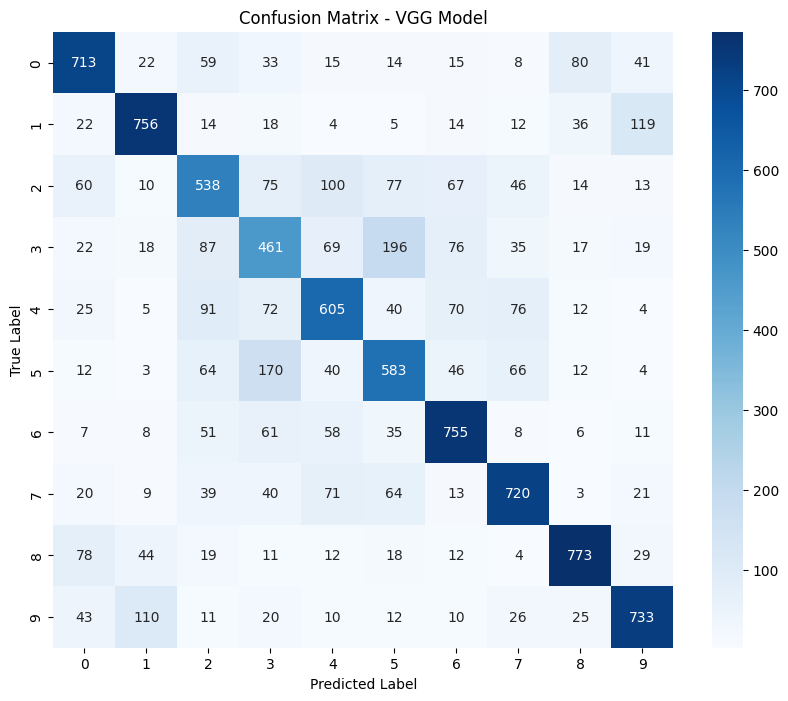

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      1000
           1       0.77      0.76      0.76      1000
           2       0.55      0.54      0.55      1000
           3       0.48      0.46      0.47      1000
           4       0.61      0.60      0.61      1000
           5       0.56      0.58      0.57      1000
           6       0.70      0.76      0.73      1000
           7       0.72      0.72      0.72      1000
           8       0.79      0.77      0.78      1000
           9       0.74      0.73      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# ✅ **1️⃣ التنبؤ بالتصنيفات لبيانات الاختبار**
y_pred = model_vgg.predict(x_test)  # استخراج الاحتمالات
y_pred_classes = np.argmax(y_pred, axis=1)  # استخراج الفئة ذات أعلى احتمال
y_true = np.argmax(y_test, axis=1)  # الفئات الحقيقية

# ✅ **2️⃣ حساب مصفوفة التشويش**
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# ✅ **3️⃣ رسم مصفوفة التشويش**
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - VGG Model')
plt.show()

# ✅ **4️⃣ تقرير الأداء لكل فئة**
report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", report)


**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [17]:
# تقييم النموذج على بيانات الاختبار
test_loss, test_acc = model_vgg.evaluate(x_test, y_test, verbose=1)

# طباعة الدقة
print(f"🔹 Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6692 - loss: 2.3985
🔹 Test Accuracy: 66.37%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [18]:
from keras.backend import clear_session
clear_session()

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.backend import clear_session

# تنظيف الجلسة من أي نماذج سابقة
clear_session()

# بناء نموذج VGG
model_vgg = Sequential()

# ✅ 1️⃣ طبقتان Convolutional بـ 64 مرشحًا
model_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling بعد الطبقات التلافيفية

# ✅ 2️⃣ طبقتان Convolutional بـ 128 مرشحًا
model_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling بعد الطبقات التلافيفية

# ✅ 3️⃣ طبقتان Convolutional بـ 256 مرشحًا
model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling بعد الطبقات التلافيفية

# ✅ 4️⃣ Flatten لتحويل المخرجات إلى شكل 1D
model_vgg.add(Flatten())

# ✅ 5️⃣ طبقة Dense بـ 128 وحدة
model_vgg.add(Dense(128, activation='relu'))

# ✅ 6️⃣ طبقة التصنيف النهائية (10 فئات - softmax)
model_vgg.add(Dense(10, activation='softmax'))

# ✅ طباعة ملخص النموذج
model_vgg.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.1545 - loss: 2.2326 - val_accuracy: 0.3427 - val_loss: 1.8659
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 394ms/step - accuracy: 0.3510 - loss: 1.8103 - val_accuracy: 0.4195 - val_loss: 1.6363
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 380ms/step - accuracy: 0.4412 - loss: 1.5608 - val_accuracy: 0.4836 - val_loss: 1.4871
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 385ms/step - accuracy: 0.5227 - loss: 1.3450 - val_accuracy: 0.5430 - val_loss: 1.2758
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 386ms/step - accuracy: 0.5751 - loss: 1.2073 - val_accuracy: 0.5774 - val_loss: 1.2057
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 384ms/step - accuracy: 0.6162 - loss: 1.0882 - val_accuracy: 0.6080 - val_loss: 1.1215
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 387ms/step - accuracy: 0.6550 - loss: 0.9813 - val_accuracy: 0.6342 - val_loss: 1.0563
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 388ms/step - accuracy: 0.7002 - loss: 0.8662 - val_accura

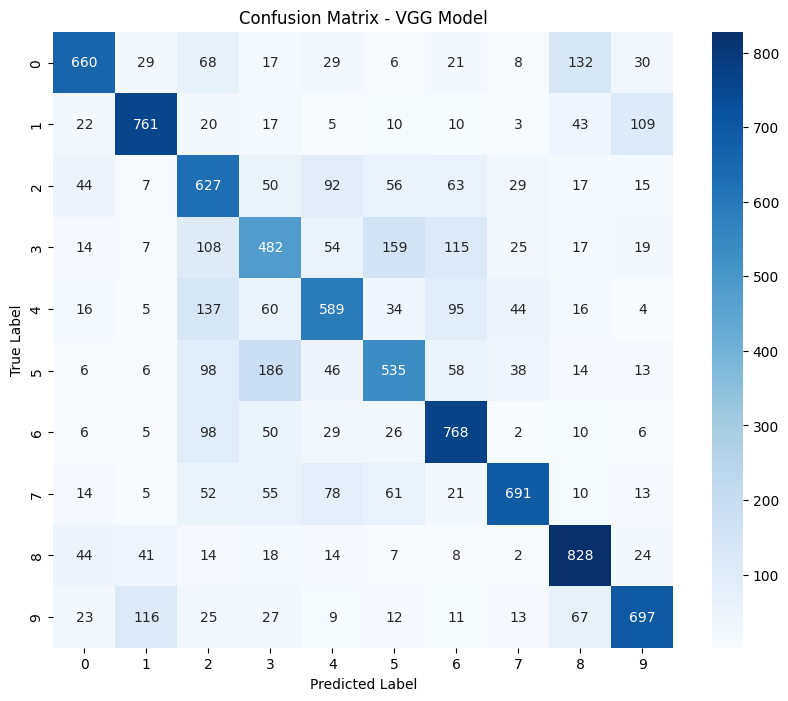

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.66      0.71      1000
           1       0.77      0.76      0.77      1000
           2       0.50      0.63      0.56      1000
           3       0.50      0.48      0.49      1000
           4       0.62      0.59      0.61      1000
           5       0.59      0.54      0.56      1000
           6       0.66      0.77      0.71      1000
           7       0.81      0.69      0.75      1000
           8       0.72      0.83      0.77      1000
           9       0.75      0.70      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.backend import clear_session
from sklearn.metrics import confusion_matrix, classification_report

# ✅ تنظيف الجلسة
clear_session()

# ✅ **1️⃣ تحميل بيانات CIFAR-10 وإعادة تشكيل الصور إلى 64×64**
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# تحويل القيم إلى أرقام عشرية بين 0 و 1 (تطبيع البيانات)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# إعادة تحجيم الصور إلى 64×64
x_train = tf.image.resize(x_train, (64, 64))
x_test = tf.image.resize(x_test, (64, 64))

# تحويل التصنيفات إلى One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# ✅ **2️⃣ بناء نموذج VGG**
model_vgg = Sequential()

# طبقتان Convolutional بـ 64 مرشحًا
model_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2)))

# طبقتان Convolutional بـ 128 مرشحًا
model_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2)))

# طبقتان Convolutional بـ 256 مرشحًا
model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2)))

# تحويل المخرجات إلى شكل 1D
model_vgg.add(Flatten())

# طبقة Dense بـ 128 وحدة
model_vgg.add(Dense(128, activation='relu'))

# طبقة التصنيف النهائية (10 فئات)
model_vgg.add(Dense(10, activation='softmax'))

# ✅ **3️⃣ تجميع النموذج**
model_vgg.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)

# ✅ **4️⃣ تدريب النموذج لمدة 10 حقبات**
history = model_vgg.fit(
    x_train, y_train,
    epochs=10,
    batch_size=512,
    validation_data=(x_test, y_test),
    verbose=1
)

# ✅ **5️⃣ التنبؤ بنتائج الاختبار**
y_pred = model_vgg.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# ✅ **6️⃣ حساب مصفوفة التشويش**
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# ✅ **7️⃣ رسم مصفوفة التشويش**
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - VGG Model')
plt.show()

# ✅ **8️⃣ طباعة تقرير الأداء**
report = classification_report(y_true, y_pred_classes)
print("🔹 Classification Report:\n", report)


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**
_
1 - Use of activation functions:
 Activation functions introduce non-linearity, allowing neural networks to learn complex patterns.

2 - Key Differences between sigmoid and softmax:
Sigmoid outputs independent probabilities (used for binary classification), while Softmax normalizes outputs into a probability distribution (used for multi-class classification).

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
Binary crossentropy is for two-class problems, while categorical crossentropy is for multi-class classification with one-hot encoded labels.